In [1]:
import numpy as np
import lbg_forecast.modified_redshift as mr
import lbg_forecast.modified_bias as mb
from lbg_forecast import modified_probes
from jax_cosmo import probes
from jax_cosmo.angular_cl import angular_cl
from lbg_forecast.modified_angular_cl import noise_cl

import matplotlib.pyplot as plt

import jax
from jax import jit
import jax.numpy as jnp
import jax_cosmo as jc

In [74]:
@jit
def cl_theory(cosmo, mu, sig, ell):

    nz = mr.gauss_nz(mu, sig, gals_per_arcmin2 = 10)

    redshift_distributions = [nz]

    bias = [mb.constant_linear_bias(1.0)]

    cosmo_probes = [probes.NumberCounts(redshift_distributions, bias)]

    signal = angular_cl(cosmo, ell, cosmo_probes)
    noise = noise_cl(ell, cosmo_probes)
    total_cl = signal + noise*0

    return jnp.hstack(total_cl)

In [75]:
ell = jnp.arange(100, 1000, 1)
cl_g = cl_theory(jc.Planck15(), 4.0, 0.5, ell)
cl_g_int = cl_theory(jc.Planck15(), 0.5, 0.1, ell)


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/jax/_src/numpy/array_methods.py:66: UserWarning: Explicitly requested dtype <class 'jax.numpy.int64'> requested in astype is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return lax_numpy.astype(arr, dtype)


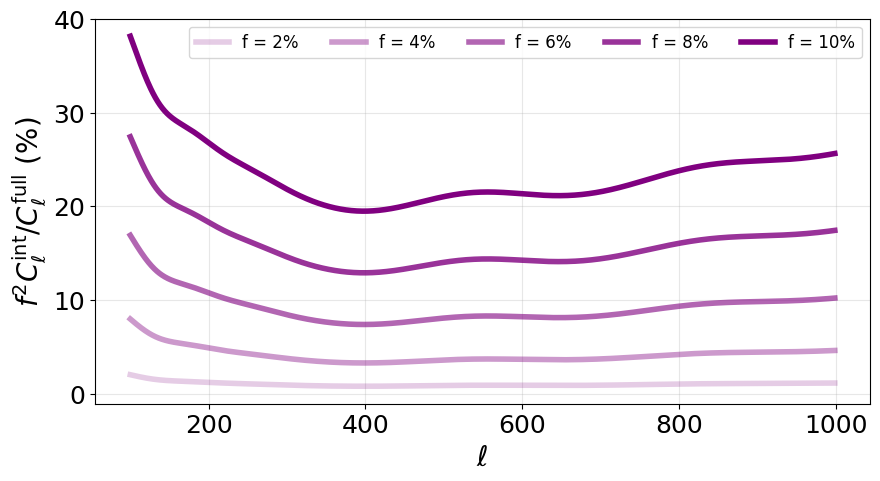

In [113]:
for f in np.array([0.02, 0.04, 0.06, 0.08, 0.10]):
    cl_tot = (f**2)*cl_g_int + ((1-f)**2)*cl_g
    plt.plot(ell, ((f**2)*cl_g_int/cl_tot)*100, label="f = "+str(int(f*100))+"%", alpha=1.0*f/0.1, color='purple', lw=4)


ax = plt.gca()
fig = plt.gcf()
ax.grid(alpha=0.3)
fig.set_size_inches(10, 5)

fs=20

plt.ylabel("$f^{2}C^{\mathrm{int}}_{\ell}/C^{\mathrm{full}}_{\ell}$ (%)", fontsize=fs)
plt.xlabel("$\ell$", fontsize=fs)

ax.legend(ncols=5, fontsize=12)

plt.tick_params('x', labelsize=18)
plt.tick_params('y', labelsize=18)

Text(0.5, 0, '$z$')

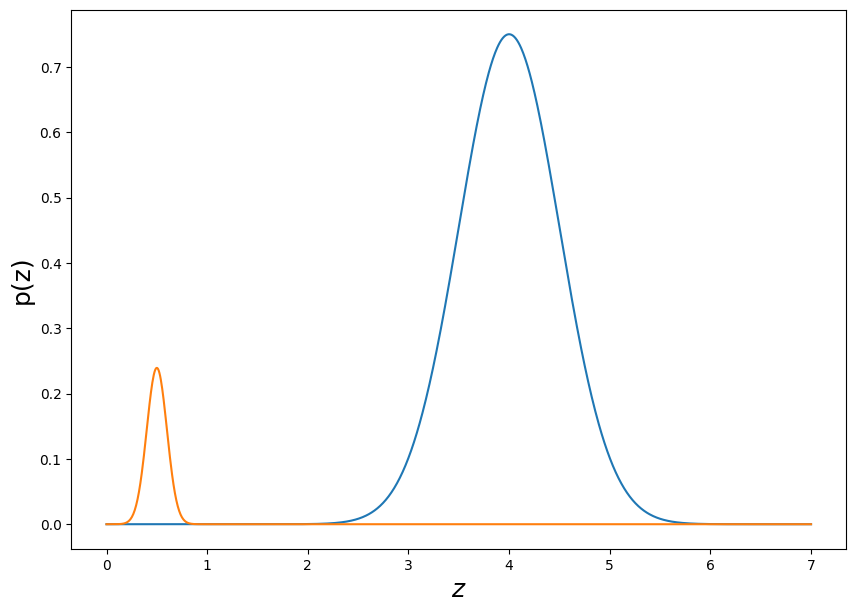

In [68]:
fig, ax1 = plt.subplots(figsize = (10, 7))

f=0.06
mu1, sigma1, mu2, sigma2 = 0.5, 0.1, 4, 0.5 
bias_val_full = 1
bias_val_LBG, bias_val_int = 1, 1

z_space = jnp.linspace(0, 7, 1000)
nz_int = mr.gauss_nz(0.5, 0.1)
nz_lbg = mr.gauss_nz(4.0, 0.5)

gauss_int = nz_int.pz_fn(z_space)*f
gauss_lbg = nz_lbg.pz_fn(z_space)*(1-f)

#nz_full = nz_tot(mu1, sigma1, mu2, sigma2, f, z_space)

plt.plot(z_space, gauss_lbg)
plt.plot(z_space, gauss_int)
#plt.plot(z_space, nz_full)

plt.ylabel("p(z)", fontsize=18)
plt.xlabel("$z$", fontsize=18)

In [20]:
def ell_to_k(ell, z):
    
    "converts spherical harmonic scale ell to 3D scale k (h factored out) in the Limber approximation in 1/Mpc"
    
    chi = Planck18.comoving_distance(z).value
    
    return (ell+0.5)/(chi*Planck18.h)

In [21]:
def k_to_ell(k, z):
    
    "converts 3D scale k (h factored out) (in 1/Mpc) to spherical harmonic ell in the Limber approximation"
    
    chi = Planck18.comoving_distance(z).value
    
    return chi*k*Planck18.h-0.5

In [22]:
def scale_to_theta(R, z):
    
    "convert scale (h factored out) (in 1/Mpc) to angular scale in arcminutes"
    
    chi = Planck18.comoving_distance(z).value
    
    return ((R/Planck18.h)/chi)*(180/np.pi)*60
    

In [23]:
def theta_to_scale(theta, z):
    
    "convert angular scale (arcmin) to scale (h factored out) (in 1/Mpc)"
    
    chi = Planck18.comoving_distance(z).value
    
    return chi*(theta/60)*(np.pi/180)*Planck18.h
    

In [24]:
(180/(43/60))

251.1627906976744

In [25]:
k_to_ell(1/theta_to_scale(43, 0.225), 0.225)

79.44759932058

In [26]:
minimum_comoving_scale = 8 #Mpc/h
comoving_fourier_mode = 1/minimum_comoving_scale #h/Mpc
comoving_fourier_mode

0.125

In [27]:
k_to_ell(comoving_fourier_mode, 0.225)

79.24683341775848

In [28]:
ell_to_k(79.24683341775848, 0.225)

0.125

(0.0, 1100.0)

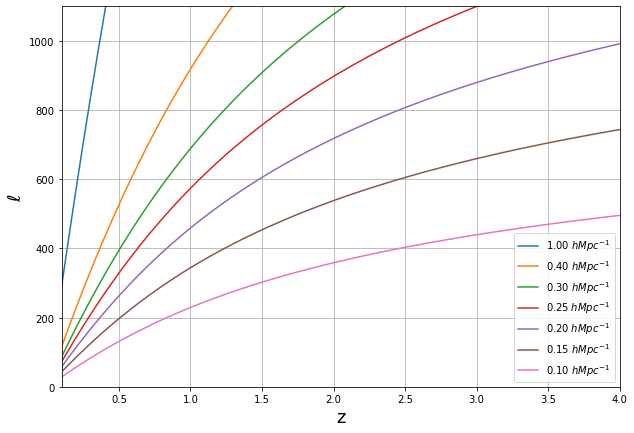

In [29]:
fig, ax1 = plt.subplots(figsize = (10, 7))
curve = []
curve2 = []
curve3 = []
curve4 = []
curve5 = []
curve6 = []
curve7 = []

for z in z_space:
    curve.append(k_to_ell(0.25, z))
    curve2.append(k_to_ell(0.30, z))
    curve3.append(k_to_ell(0.20, z))
    curve4.append(k_to_ell(0.15, z))
    curve5.append(k_to_ell(0.10, z))
    curve6.append(k_to_ell(0.40, z))
    curve7.append(k_to_ell(1.00, z))

plt.plot(z_space, curve7, label="1.00 $hMpc^{-1}$")
plt.plot(z_space, curve6, label="0.40 $hMpc^{-1}$")
plt.plot(z_space, curve2, label="0.30 $hMpc^{-1}$")
plt.plot(z_space, curve, label="0.25 $hMpc^{-1}$")
plt.plot(z_space, curve3, label="0.20 $hMpc^{-1}$")
plt.plot(z_space, curve4, label="0.15 $hMpc^{-1}$")
plt.plot(z_space, curve5, label="0.10 $hMpc^{-1}$")
plt.xlabel("z", fontsize=18)
plt.ylabel("$\ell$", fontsize=18)
plt.legend()
plt.grid()
plt.xlim(0.1, 4)
plt.ylim(0, 1100)

(0.1, 4.0)

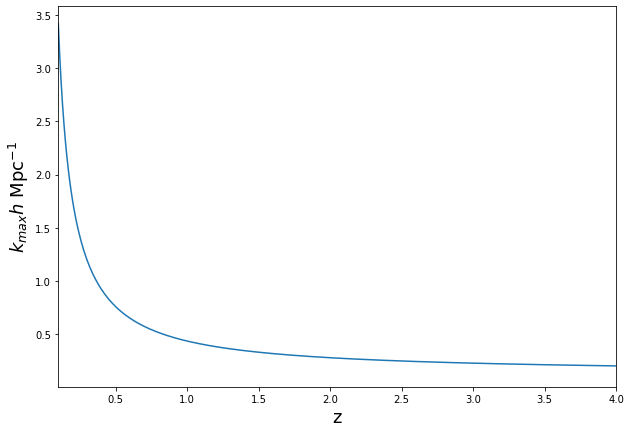

In [30]:
fig, ax1 = plt.subplots(figsize = (10, 7))

curve = []
for z in z_space:
    curve.append(ell_to_k(1000, z))
    
plt.plot(z_space, curve)
plt.xlabel("z", fontsize=18)
plt.ylabel("$k_{max}h$ Mpc$^{-1}$", fontsize=18)
plt.xlim(0.1, 4)
#plt.ylim(0, 1100)

################ k < k_max are kept at this ell cut